<a href="https://colab.research.google.com/github/LcIzid0r0/IJCA/blob/main/Tratamento_dados_acidentes_AFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAÇÃO BIBLIOTECA

In [151]:
import pandas as pd
from google.colab import files
import datetime
import numpy as np

IMPORTAÇÃO ARQUIVO CSV **( BRONZE )**


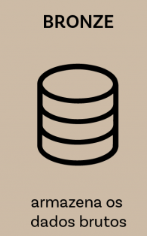

In [126]:
df = pd.read_csv('/content/drive/MyDrive/acidentes-2025.csv',index_col=['id'], encoding="latin1", sep=";",)

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CORREÇÃO DE DADOS NULOS **( SILVER )**

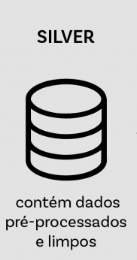

In [128]:
df['uop'] = df['uop'].fillna("NÃO ESPECIFICADA")

In [129]:
df['delegacia'] = df['delegacia'].fillna("NÃO INFORMADA")

In [130]:
df['regional'] = df['regional'].fillna("NÃO INFORMADA")

In [131]:
df['sexo'] = df['sexo'].fillna("Não Informado")

In [132]:
df['tipo_veiculo'] = df['tipo_veiculo'].fillna("Não Especificado")

In [133]:
df['classificacao_acidente'] = df['classificacao_acidente'].fillna("Não Classificado")

In [134]:
df['tipo_envolvido'] = df['tipo_envolvido'].fillna("Não Especificado")

In [135]:
df['estado_fisico'] = df['estado_fisico'].fillna("Desconhecido")

CORREÇÃO FORMATO DO HORÁRIO

In [136]:
df['horario'] = df['horario'].astype('string')

CORREÇÃO NOME DA COLUNA

In [137]:

df.rename(columns={'horario': 'hora'}, inplace=True)

In [138]:

df.rename(columns={'data_inversa': 'data'}, inplace=True)

REMOÇÃO DE COLUNAS

In [139]:
df.drop('pesid', axis=1, inplace=True)

In [140]:
df.drop('id_veiculo', axis=1, inplace=True)

In [141]:
df.drop('uso_solo', axis=1, inplace=True)

CORREÇÃO COLUNA IDADE

In [142]:
df.loc[df['idade'] > 120, 'idade'] = 0

In [143]:
#df['idade'].idxmax()

#indice_maximo = df['idade'].max()
#print(f"O índice do valor máximo é: {indice_maximo}")

#indice_maximo = df['idade'].idxmax()
#linha_maxima = df.loc[indice_maximo]
#print("idade")
#print(linha_maxima)


CORREÇÃO VARIAÇÕES DE SEXO NÃO INFORMADO PARA APENAS 1 PADRÃO

In [144]:
df.sexo = df.sexo.replace({'Ignorado': 'Não Informado'})

CORREÇÃO VARIAÇÕES PARA PADRANIZAÇÃO

In [145]:
df.marca = df.marca.replace({'Não Informado/Não Informado': 'NÃO INFORMADO'})

In [146]:
df.tipo_envolvido = df.tipo_envolvido.replace({'Cavaleiro': 'Não Especificado'})

In [147]:
df.estado_fisico = df.estado_fisico.replace({'Não Informado': 'Desconhecido'})

In [148]:
#df.isnull().sum()
#df.info()
#df['delegacia'].unique()
#df.head() #Visualização Tabela

CSV TRATADO **( GOLD )**

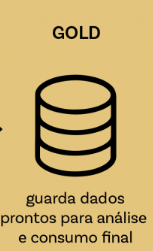

In [149]:
df.to_csv('dados_acidente.csv')

In [150]:
from IPython.utils.text import string
#files.download('dados_acidente.csv')
